# PART3 パラメータをチューニングしてみよう

## おまじない

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV

## データの読み込み
- train.csvとtest.csvとsubmit_sample.csvの３つのファイルを読み込みましょう
- それぞれを読み込んだものは変数はtrain, test, sampleに代入しましょう

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
sample = pd.read_csv('submit_sample.csv', header=None)

## trainから説明変数となるデータを取り出しましょう
- iloc[]を使います
- y以外を説明変数として取り出し、変数trainXに代入しましょう

In [3]:
trainX = train.iloc[:, 0:17]
trainX

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27123,27124,42,blue-collar,married,primary,no,1455,yes,no,cellular,2,feb,279,2,269,2,other
27124,27125,34,services,single,secondary,no,719,yes,no,unknown,15,may,362,3,-1,0,unknown
27125,27126,36,blue-collar,single,primary,no,49,yes,no,unknown,8,may,405,1,-1,0,unknown
27126,27127,33,housemaid,married,primary,no,209,no,no,cellular,12,aug,76,4,-1,0,unknown


## trainから目的変数となるデータを取り出しましょう
- yを選択し、変数yに代入しましょう

In [4]:
y = train['y']

## testから説明変数となるデータを取り出しましょう
- testの全てのカラムが説明変数となりますので、copy関数を使って変数testXに代入します

In [5]:
testX = test.copy()

## trainXとtestXをダミー変数化しましょう

In [6]:
trainX = pd.get_dummies(trainX)
testX = pd.get_dummies(testX)

## 決定木モデルの箱を用意しましょう
- 変数名をclf1とし、DT()を代入しましょう
- パラメータは一旦、max_depth=2, min_samples_leaf=500としましょう

In [7]:
clf1 = DT(max_depth=2, min_samples_leaf=500)

## クロスバリデーションをしてclf1の精度を確かめてみましょう
- cross_validate関数を使います
- オプションには、clf1, trainX, y, cv=5, scoring="roc_auc",n_jobs=-1と書きます

In [8]:
cross_validate(clf1, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.05983782, 0.06282783, 0.06482697, 0.04787254, 0.05484653]),
 'score_time': array([0.00598383, 0.00697923, 0.00998211, 0.00698209, 0.00797868]),
 'test_score': array([0.74657601, 0.76182968, 0.73117591, 0.73707281, 0.75910043]),
 'train_score': array([0.74534692, 0.74543889, 0.75305367, 0.75162494, 0.746135  ])}

## 異なるパラメータでもう一度決定木の箱を準備しましょう
- 変数はclf2としましょう
- パラメータはmax_depth=10, min_samples_leaf=500としましょう

In [9]:
clf2 = DT(max_depth=10, min_samples_leaf=500)

## クロスバリデーションをしてclf2の精度を確かめてみましょう

In [10]:
cross_validate(clf2, trainX, y, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)

{'fit_time': array([0.14561105, 0.10773063, 0.14162135, 0.14062524, 0.14062071]),
 'score_time': array([0.00598454, 0.0039711 , 0.0069809 , 0.00597787, 0.00598454]),
 'test_score': array([0.88264002, 0.88482571, 0.86778474, 0.8924153 , 0.88343681]),
 'train_score': array([0.88842017, 0.89038512, 0.89288003, 0.8876343 , 0.885615  ])}

## 新たな決定木モデルの箱を準備しましょう
- 変数clf3とし、今回は特にパラメータはセットしません

In [11]:
clf3 = DT()

## グリッドサーチを試してみましょう
- パラメータの範囲を指定し、その範囲をしらみつぶしに調べることで、最適なパラメータを探索することをグリッドサーチといいます
- グリッドサーチ＋クロスバリデーションの組み合わせは良くパラメータ探索の方法として利用されます
- まず探索するパラメータの範囲を表す変数parametersを作ります
- この変数を作る時、"カギ"括弧ではなく、"波"括弧であることに注意して下さい
- {"パラメータの名前①":[範囲], "パラメータの名前②":[範囲]...}のように書きます
- 今回はmax_depthを2から10まで探索してみます

In [12]:
parameters = {"max_depth":[2,3,4,5,6,7,8,9,10]}

In [13]:
parameters = {"max_depth": list(range(2,11))}

In [14]:
parameters

{'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

## グリッドサーチ+クロスバリデーションで最適なパラメータを探してみましょう

- GridSearchCV関数を使います
- オプションとして、clf3, parameters, cv=5, scoring="roc_auc",n_jobs=-1と書きます
- グリッドサーチの結果は、変数gcvに代入しましょう
- その後、fit関数を使って、探索をしましょう

In [15]:
gcv = GridSearchCV(clf3, parameters, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
           

## グリッドサーチの結果を見てみましょう
- cv_____results_で結果を見る事が出来ます

In [16]:
gcv.cv_results_

{'mean_fit_time': array([0.07500052, 0.11409478, 0.14301643, 0.15897431, 0.17353463,
        0.19707279, 0.23497124, 0.24414606, 0.23338051]),
 'std_fit_time': array([0.01607308, 0.02034746, 0.01568802, 0.03370127, 0.01615576,
        0.01831995, 0.01830917, 0.01402642, 0.01160653]),
 'mean_score_time': array([0.00897593, 0.0073801 , 0.0245358 , 0.00718141, 0.00658231,
        0.00738034, 0.00718055, 0.00658221, 0.00578442]),
 'std_score_time': array([0.00109328, 0.00101606, 0.02543162, 0.00097684, 0.00048817,
        0.00101764, 0.00039859, 0.00048877, 0.00074646]),
 'param_max_depth': masked_array(data=[2, 3, 4, 5, 6, 7, 8, 9, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 2},
  {'max_depth': 3},
  {'max_depth': 4},
  {'max_depth': 5},
  {'max_depth': 6},
  {'max_depth': 7},
  {'max_depth': 8},
  {'max_depth': 9},
  {'max_depth': 10}],
 'split0_t

## cv_____results_の中で重要な２つをみてみましょう
- cv_____results_["mean_train_score"]とcv_____results_["mean_test_score"]です
- それぞれ変数train_scoreとtest_scoreに代入しましょう

In [17]:
train_score = gcv.cv_results_['mean_train_score']
test_score = gcv.cv_results_['mean_test_score']

In [18]:
train_score

array([0.74831988, 0.8124462 , 0.84413528, 0.85725834, 0.86924738,
       0.88601794, 0.89895611, 0.91029478, 0.92414583])

## train_scoreとtest_scoreを可視化しましょう
- x軸をmax_depth、y軸をaucとしてグラフを描きます
- 何も設定しないとx軸は0からスタートとなり、実際の値とずれてしまうので、調整が必要です
- 調整をする為には、plt.xticks([0,1],[2,3])のように書きます
- 上記のオプションの意味は何もしない時に0のものを2とし、1のものを3とする、という意味になります
- 今回はmax_depthを2～10まで調べたので9点あります

([<matplotlib.axis.XTick at 0x297da46c688>,
 <a list of 9 Text xticklabel objects>)

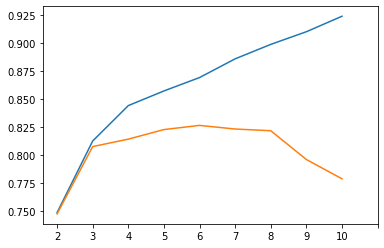

In [19]:
plt.plot(train_score)
plt.plot(test_score)
plt.xticks(list(range(0, 10)), list(range(2, 11)))

## グリッドサーチで選ばれたパラメータを確認しましょう
- best_____params_で結果を見ることができます

In [20]:
gcv.best_params_

{'max_depth': 6}

## testの予測しましょう
- gcvもpredict_proba関数を持っており、自動的に最適なパラメータを使ったモデルで予測がされます
- 予測結果はpredに代入しましょう。その後、1の確率のみを取り出して、再びpredに代入しましょう

In [21]:
pred = gcv.predict_proba(testX)

In [22]:
pred = pred[:,1]

## predをsample[1]に代入してファイル出力し、DeepAnalyticsへ投稿しましょう
- ファイル名は「submit3_bank.csv」としましょう
- index=None,header=Noneのオプションを忘れないように書きだしましょう

In [23]:
sample[1] = pred
sample.to_csv('submit3_bank.csv', index=None, header=None)

# 実習

1.新たな決定木モデルの箱を変数clf4として準備してみよう。パラメータの設定は不要です

In [24]:
clf4 = DT()

2.max_depthとmin_samples_leafの値の範囲を指定した変数parameters2を作ろう
- max_depthは2～10まで、min_samples_leafは[5,10,20,50,100,500]にしましょう

In [25]:
parameters2 = {"max_depth": list(range(2,11)), "min_samples_leaf": [5,10,20,50,100,500]}

3.グリッドサーチ+クロスバリデーションで最適なパラメータを探そう。グリッドサーチの結果は変数gcv2に代入しよう

In [26]:
gcv2 = GridSearchCV(clf4, parameters2, cv=5, scoring="roc_auc", n_jobs=-1, return_train_score=True)
gcv2.fit(trainX, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
            

4.最適なパラメータはなんだったか確かめてみよう

In [27]:
gcv2.best_params_

{'max_depth': 10, 'min_samples_leaf': 50}

5.testの予測をし、予測結果のうち、１となる確率のみを変数pred2に代入しよう

In [28]:
pred2 = gcv2.predict_proba(testX)

In [29]:
pred2 = pred2[:,1]

6.pred2をsample[1]に代入して"submit4_bank.csv"としてファイル出力し、DeepAnalyticsへ投稿しよう

In [30]:
sample[1] = pred2
sample.to_csv('submit4_bank.csv', index=None, header=None)